In [1]:
from NFW import NFW,NFW_analytic
from SIS import SIS_analytic
from Profile import Profile
import numpy as np
import matplotlib.pyplot as plt

G = 4.492*10**(-6) # kpc^3/Msun/Gyr^2

# Comparison between integrated and analytic NFW

In [2]:
Rv = 200 #kpc
c = 20
Mv = 10**12 #Msun
rho = Mv/(4*np.pi*Rv**3/c**3 * (np.log(1+c)-c/(1+c)))

myNFW = NFW(trunc_r = Rv,rho=rho,rs=Rv/c)
myNFW_a = NFW_analytic(trunc_r=Rv,rho=rho,rs=Rv/c)
print("Integrated mass in Rv: %f"%(np.log10(myNFW.mass(Rv,r_min=0.01*Rv))))
print('Analytic mass in Rv: %f'%(np.log10(myNFW_a.mass(Rv))))

Integrated mass in Rv: 11.996738
Analytic mass in Rv: 12.000000


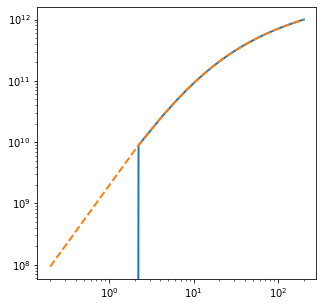

In [3]:
rlist = np.linspace(0.001,1,100)*Rv

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(rlist,myNFW.mass(rlist,r_min=0.001*Rv),linewidth=2)
ax.plot(rlist,myNFW_a.mass(rlist),linestyle='dashed',linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')

# Compare profiles

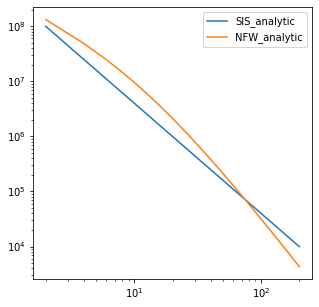

In [5]:
Vc = np.sqrt(G*Mv/Rv)
mySIS = SIS_analytic(Rv,Vc)
mySIS.compare_with(myNFW_a,r_min=0.01*Rv)